# Fractional Brownian Motion Parameter Estimation Using Periodogram Method

The periodigram method uses the fractional brownian noise power spectrum to estimate the Hurst,</br>
denoted by $H$. The power spectrum is the Fourier transform of the fractional brownian motion noise autocorrelation</br>
function. This relationship is called the Weiner-Khichnin theorem.</br>

Let $Z^H(t)$ denote a fractional path then fractional brownian noise is defined by,

$
\begin{align}
\Delta Z_k^H = Z^H(t_k) - Z^H(t_{k-1})
\end{align}
$

where $t_k = k \Delta t$. It follows that,

$
\begin{align}
Z^H(n\Delta t) = \sum_{i=1}^n \Delta Z_k^H
\end{align}
$

The autocovariance of fractional brownian noise is given by,

$
\begin{align}
\gamma^H_n = \text{Cov}[\Delta Z^H_t \Delta Z^H_{t+n}] = \frac{1}{2}\Delta t^{2H}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

Since $\text{Var}(\Delta Z_k^H) = \Delta t^{2H}$ the autocorrelation coefficient is defined by,</br>

$
\begin{align}
\rho^H_n = \frac{\gamma^H_n}{\Delta t^{2H}} = \frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

From the Weiner-Khichnin theorem the power spectrum is given by,</br>

$
\begin{align}
\hat{\rho}^H_\omega = \frac{1}{2} \int_{-\infty}^{\infty} \rho^H_n e^{-i \omega n} dn
\end{align}
$

It can be shown that fir $\omega \ggg 1$,

$
\begin{align}
\hat{\rho}^H_\omega \approx C\lvert \omega \rvert^{1 - 2H}
\end{align}
$

where $C$ is independent of $\omega$. It follows that $H$ can be determined by using OLS on $\hat{\rho}^H_\omega$ as a</br>
function of $\omega$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (FBM, Stats, PlotType, Est)
from lib import (curve, single_var)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
npts = 2**10

## Power Spectrum Simulation H=0.8

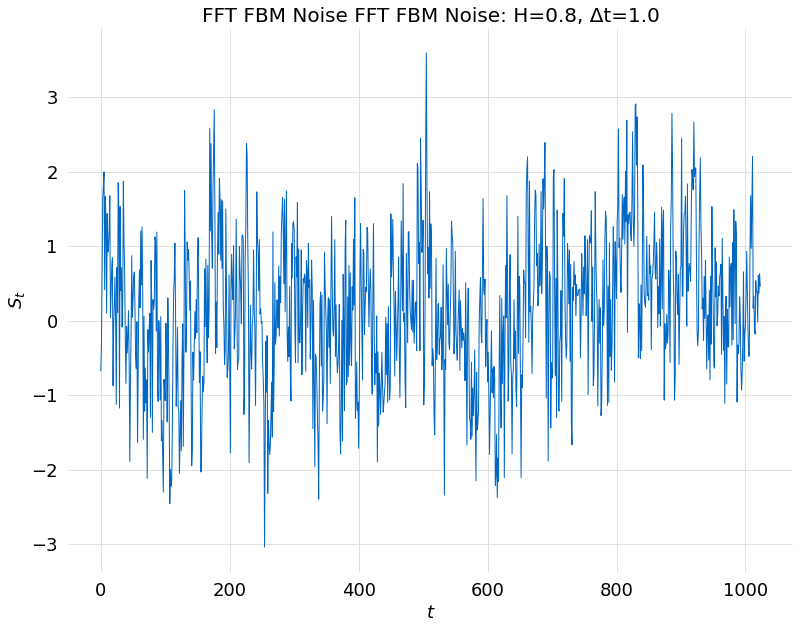

In [3]:
H = 0.8
fbm = FBM.Source.NOISE_FFT.create(H=H, npts=npts)
curve(fbm, lw=1)

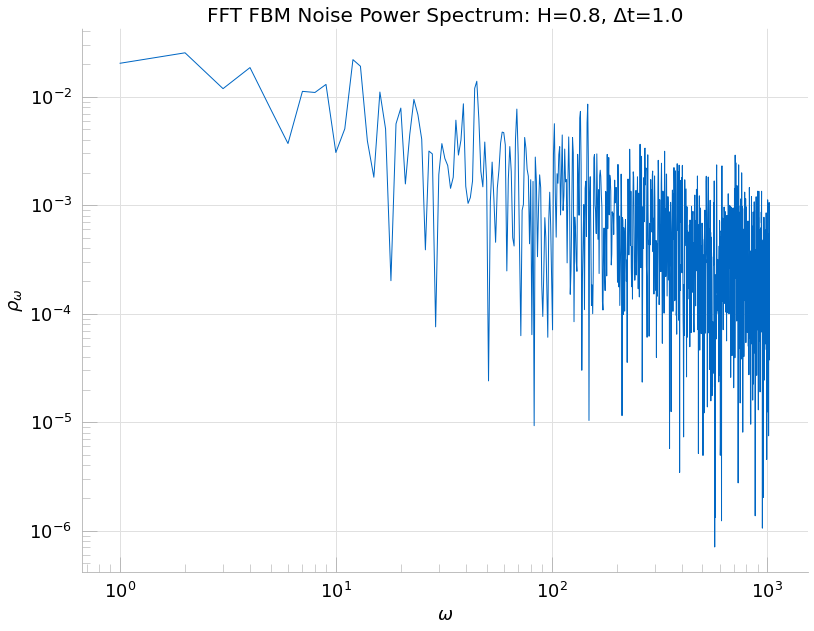

In [4]:
ps = Stats.Func.PSPEC.apply(fbm)
curve(ps, lw=1, plot_type=PlotType.LOG)

In [5]:
results = Est.PERGRAM.perform(ps)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   s(ω)   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     336.5
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           3.46e-65
Time:                        15:25:47   Log-Likelihood:                -842.10
No. Observations:                1023   AIC:                             1688.
Df Residuals:                    1021   BIC:                             1698.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5116      0.105    -14.352      0.000      -1.718      -1.305
ω             -0.7395      0.040    -18.345      0.000      -0.819      -0.660
==============================================================================
Omnibus:                      198.645   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.351
Skew:                          -1.124   Prob(JB):                     3.85e-86
Kurtosis:                       5.043   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
ps.attrs

{'SourceType': <Source.NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-8548f711-6414-48a4-bd24-b86ea834a1f5',
 'Schema': DataSchema(xcol=(ω), ycol=(s(ω)), data_type=(DataType.FOURIER_TRANS)),
 'Date': '19/06/2022 15:25:47',
 'Type': <Func.PSPEC: 'PSPEC'>,
 'Name': 'PSPEC-c3515003-edae-4e2c-9fe6-0ff61e187c4c',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.8, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'PSPEC': {'npts': 1023,
  'DataType': <DataType.FOURIER_TRANS: 'FOURIER_TRANS'>,
  'Parameters': {},
  'Description': 'Power Spectrum',
  'ylabel': '$\\rho_\\omega$',
  'xlabel': '$\\omega$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'PERGRAM': {'Type': <Est.PERGRAM: 'PERGRAM'>,
  

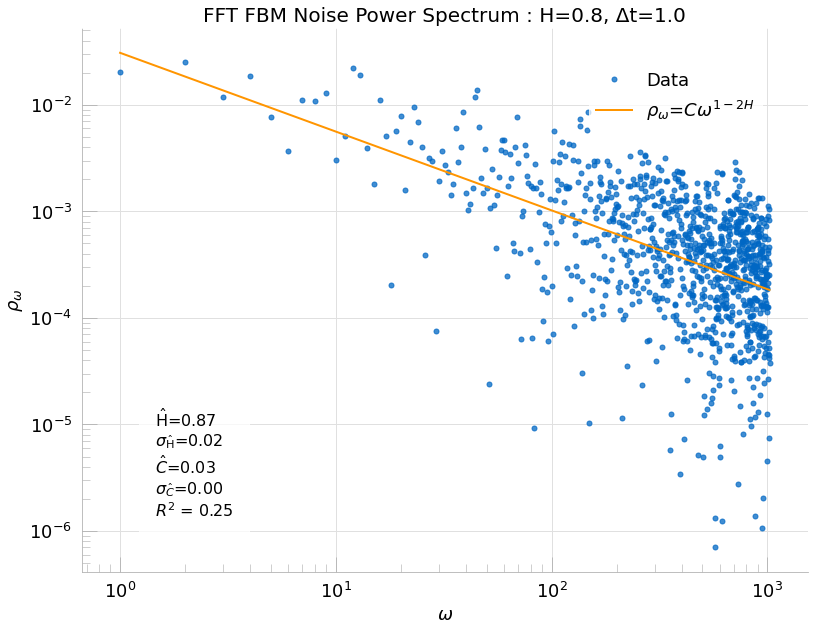

In [7]:
single_var(ps, est_type=Est.PERGRAM)

## Power Spectrum Simulation H=0.3

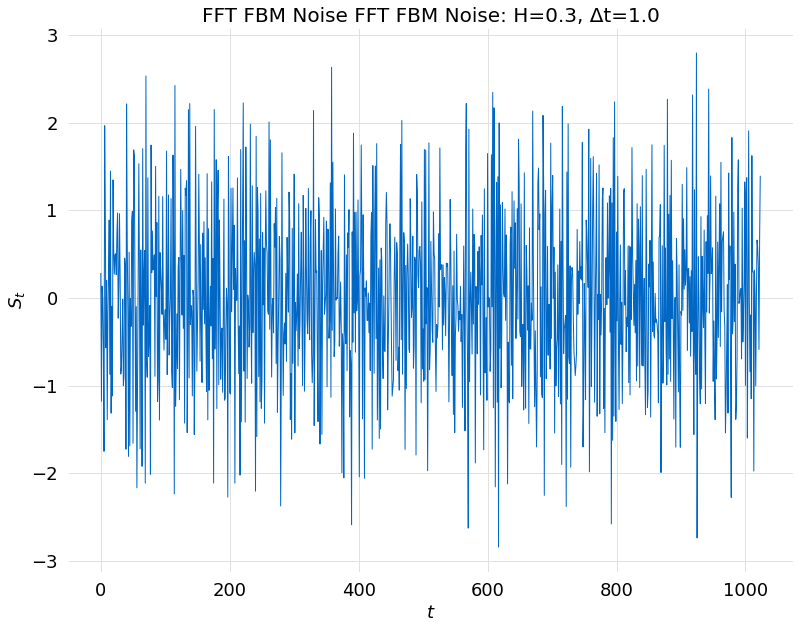

In [8]:
H = 0.3
fbm = FBM.Source.NOISE_FFT.create(H=H, npts=npts)
curve(fbm, lw=1)

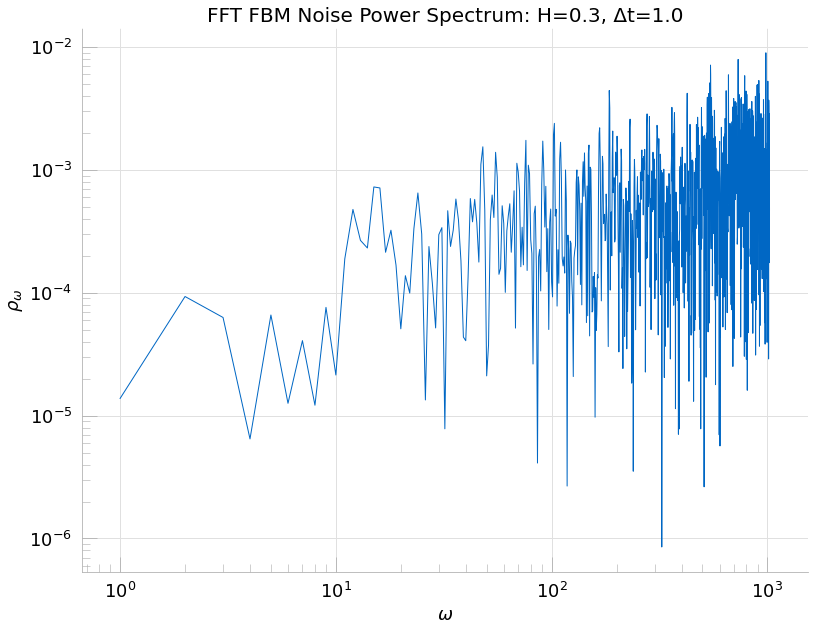

In [9]:
ps = Stats.Func.PSPEC.apply(fbm)
curve(ps, lw=1, plot_type=PlotType.LOG)

In [10]:
results = Est.PERGRAM.perform(ps)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   s(ω)   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           3.33e-28
Time:                        15:25:51   Log-Likelihood:                -848.93
No. Observations:                1023   AIC:                             1702.
Df Residuals:                    1021   BIC:                             1712.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4875      0.106    -42.324      0.000      -4.696      -4.279
ω              0.4606      0.041     11.351      0.000       0.381       0.540
==============================================================================
Omnibus:                      147.554   Durbin-Watson:                   1.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.112
Skew:                          -0.967   Prob(JB):                     6.53e-51
Kurtosis:                       4.297   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
ps.attrs

{'SourceType': <Source.NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-fc4644b6-3a9d-44e6-879c-86d8ca55cf94',
 'Schema': DataSchema(xcol=(ω), ycol=(s(ω)), data_type=(DataType.FOURIER_TRANS)),
 'Date': '19/06/2022 15:25:51',
 'Type': <Func.PSPEC: 'PSPEC'>,
 'Name': 'PSPEC-86d60127-5fea-4832-b637-553eb15ab78d',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.3, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'PSPEC': {'npts': 1023,
  'DataType': <DataType.FOURIER_TRANS: 'FOURIER_TRANS'>,
  'Parameters': {},
  'Description': 'Power Spectrum',
  'ylabel': '$\\rho_\\omega$',
  'xlabel': '$\\omega$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'PERGRAM': {'Type': <Est.PERGRAM: 'PERGRAM'>,
  

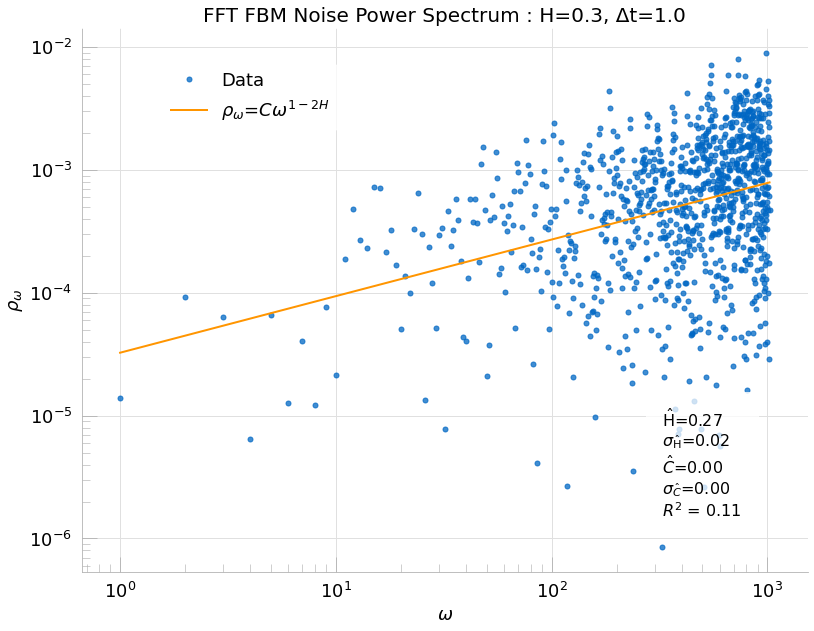

In [12]:
single_var(ps, est_type=Est.PERGRAM)